<a href="https://colab.research.google.com/github/huy7/Bluemountain_childcare_analysis/blob/main/Blue_Mountain_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Goal
1.   Top 3 insights that our customer’s team can take away to make decisions/improvements to their business
2.   Outline a particular key trend you have uncovered in the data which would be helpful for them focus on over the next 6 months.  Why should they focus on this, and what in the data/report supports it 





This is a customer survey and NPS data, look at a customer, we know exactly how likely they want to recommend Blue_Mountain childcare to other, if they are very likely, there might be some exemplary service that standing out to them; and also in reverse, there can be service which hit all time low.

A very worth-to-mention point is the level in which we can really trust the feedback data that they give. So first most important thing, profiling the data and see if there's data integrity issue. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_src = "https://github.com/huy7/Bluemountain_childcare_analysis/blob/main/blue_mountain_dataset.xlsx?raw=true"
raw_df = pd.read_excel(data_src, sheet_name = "Data")

In [5]:
raw_df.head()

,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
0,7,Sydney,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Curriculum & P...",NaN,2022-05,2022,2022-Q2,Closed,2022-05-25 16:47:45.627,Blue
1,4,Melbourne,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-11,2022-05-06,"""Communication""",NaN,2022-05,2022,2022-Q2,Closed,2022-05-25 17:41:09.508,Red
2,13,Brisbane,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-04-29,2022-04-27,"""Campus Directors & Educators"",""Cleanliness & ...",NaN,2022-05,2022,2022-Q2,Closed,2022-05-24 10:40:36.112,Green
3,16,Perth,9,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-10,"""App & Child Updates"",""Campus Directors & Educ...",NaN,2022-05,2022,2022-Q2,In Progress,2022-05-24 13:04:49.949,Blue
4,20,Adelaide,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Communication""",NaN,2022-05,2022,2022-Q2,Pending,2022-05-23 20:48:56.323,Purple


# Data profiling

Get to know how the data looks like:

1. What type of data?
2. what's the distribution?
3. Is there any data quality issue


In [6]:
#Get to see all the column name
raw_df.columns

Index(['Area', 'City', 'NPS', 'NPS Label', 'Ambience And Atmosphere',
       'Curriculum and Activities', 'Visit Booking Process',
       'Environment And Facilities', 'Information and Experience', 'Questions',
       'Nutritious Meals', 'Value For Money', 'Survey Response Date [GMT]',
       'Responded Week Starting on [GMT]', 'Survey Sent Date [GMT]',
       'Start Date', 'NPS Feedback Categories',
       'Improvement Feedback Categories', 'Response Month (YYYY-MM)',
       'Response Year (YYYY)', 'Response Quarter (YYYY-Q#)', 'Workflow Status',
       'Last Modified Date', 'Division'],
      dtype='object')

We know are and city refer to the samething (but not exactly what exactly they referring to is actually pretty annoying for me). But anyway, here's how it looks like. We try to use visualisation to make this notebook as lively and as colorful as possible. Also a way for me to practice my visualisation skill tho :)

###0.Area

In [7]:
raw_df["Area"].describe()

count    2035.000000
mean       12.473710
std         7.098525
min         1.000000
25%         7.000000
50%        12.000000
75%        19.000000
max        25.000000
Name: Area, dtype: float64

## 1. City: Where is the healthcare located (in Australia)

###How many city?

In [8]:
df = raw_df.copy()
(raw_df["City"] + raw_df["Area"].astype(str)).describe()
df["City"] = raw_df["Area"].astype(str) + "_" + raw_df["City"]
df["City"].describe()

count              2035
unique              337
top       21_Cranbourne
freq                 18
Name: City, dtype: object

Total of 337 City, have to be a big Pre-school org. The city with most survey response in the perior is Cranbourne, with 18 responses. 

### How many response per each city?

In [9]:
city_response = df["City"].value_counts()


In [10]:
city_response.describe()

count    337.000000
mean       6.038576
std        3.266213
min        1.000000
25%        4.000000
50%        5.000000
75%        8.000000
max       18.000000
Name: City, dtype: float64

- at least 1 response per each City
- maximum is 18
- In average a city receive 5 responses
- About 50 percent of the city receive 4-8 response

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


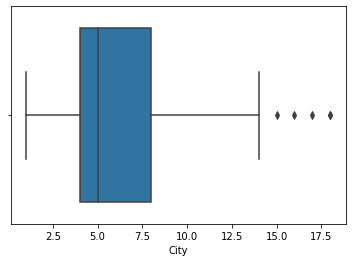

In [11]:
sns.boxplot(city_response)

- Right skewed distribution. Some city have exceptionally high number of response
- Outlier threshold: From the graphs, anything more than 13 is worth to look at


Why there's so many response in those city? (city with more than 13 response)

In [12]:
#City with number of responses >= 14
response_city = df["City"].value_counts()
print(response_city[response_city >= 14])
print("Total numer of city have >= 14 responses", response_city[response_city >= 14].count())
print("Total numer of city have >= 13 responses", response_city[response_city >= 13].count())

21_Cranbourne      18
9_Armidale         18
5_Blaxland         17
6_Southport        16
23_Kyneton         15
11_Mount Barker    14
12_Griffith        14
1_Bendigo          14
5_Ballina          14
Name: City, dtype: int64
Total numer of city have >= 14 responses 9
Total numer of city have >= 13 responses 14


In [13]:
frequent_response_city_list = response_city[response_city >= 14].index.tolist()
#frequent_response_city_list = [x[0] + "_" + str(x[1]) for x in frequent_response_city_list]
frequent_response_city_list

['21_Cranbourne',
 '9_Armidale',
 '5_Blaxland',
 '6_Southport',
 '23_Kyneton',
 '11_Mount Barker',
 '12_Griffith',
 '1_Bendigo',
 '5_Ballina']

In [14]:
#Look at the raw data to investigate further

In [15]:
#Get the list of these cities
#Use this list to filter in the raw data
popular_city_df = raw_df[(raw_df["Area"].astype(str) + "_" + raw_df["City"]).isin(frequent_response_city_list)]
popular_city_df.sort_values(by = ["City","NPS"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
frequent_response_city_list

['21_Cranbourne',
 '9_Armidale',
 '5_Blaxland',
 '6_Southport',
 '23_Kyneton',
 '11_Mount Barker',
 '12_Griffith',
 '1_Bendigo',
 '5_Ballina']

In [17]:
popular_city_df

,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
85,9,Armidale,8,Neutral,5. Strongly Agree,4. Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-11,"""Cleanliness & Hygiene"",""Curriculum & Programs...",NaN,2022-05,2022,2022-Q2,None,NaT,Blue
1355,9,Armidale,8,Neutral,4. Agree,4. Agree,4. Agree,4. Agree,5. Strongly Agree,5. Strongly Agree,...,2022-01-05,2021-12-22,"""Campus Directors & Educators"",""Communication""",NaN,2022-01,2022,2022-Q1,None,NaT,Blue
1606,9,Armidale,8,Neutral,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2021-11-24,2021-11-17,"""Environment & Facilities""",NaN,2021-11,2021,2021-Q4,None,NaT,Blue
1718,9,Armidale,8,Neutral,4. Agree,3. Neither Agree nor Disagree,5. Strongly Agree,4. Agree,4. Agree,4. Agree,...,2021-11-10,2021-11-05,"""Campus Directors & Educators""","""Curriculum & Programs""",2021-11,2021,2021-Q4,Closed,2021-11-11 12:05:13.082,Blue
538,9,Armidale,9,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-03-25,2022-03-22,"""Communication""",NaN,2022-03,2022,2022-Q1,None,NaT,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,6,Southport,10,Promoter,5. Strongly Agree,3. Neither Agree nor Disagree,5. Strongly Agree,4. Agree,5. Strongly Agree,4. Agree,...,2022-04-06,2022-04-04,"""Enrolment Process""",NaN,2022-04,2022,2022-Q2,Closed,2022-04-11 14:54:35.913,Red
1142,6,Southport,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,NaT,2022-01-27,"""Campus Directors & Educators"",""Environment & ...",NaN,2022-02,2022,2022-Q1,Closed,2022-03-10 11:23:21.484,Red
1421,6,Southport,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2021-12-10,2021-12-07,"""Campus Directors & Educators"",""Environment & ...",NaN,2021-12,2021,2021-Q4,Closed,2021-12-16 11:27:54.256,Red
1559,6,Southport,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2021-12-01,2021-11-23,"""Environment & Facilities""","""Campus Directors & Educators"",""Environment & ...",2021-12,2021,2021-Q4,Closed,2021-12-10 12:49:55.907,Red


Let's look through the data from these City to see if there's anything special

In [18]:
n_responses = popular_city_df.shape[0]
promoter_rate = popular_city_df[popular_city_df["NPS Label"] == "Promoter"].shape[0]/n_responses
detractor_rate = popular_city_df[popular_city_df["NPS Label"] == "Detractor"].shape[0]/n_responses

print("Total of number of responses", n_responses)
print("Promoter rate", promoter_rate)
print("Detractor rate", detractor_rate)
print("Average NPS", popular_city_df["NPS"].mean())
print("STD NPS", popular_city_df["NPS"].std())


Total of number of responses 140
Promoter rate 0.7928571428571428
Detractor rate 0.05714285714285714
Average NPS 9.035714285714286
STD NPS 1.9468133500513947


In [19]:
popular_city_df["NPS"].describe()

count    140.000000
mean       9.035714
std        1.946813
min        0.000000
25%        9.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: NPS, dtype: float64

What if we compare with nation-wide data?

In [20]:
n_responses = raw_df.shape[0]
promoter_rate = raw_df[raw_df["NPS Label"] == "Promoter"].shape[0]/n_responses
detractor_rate = raw_df[raw_df["NPS Label"] == "Detractor"].shape[0]/n_responses

print("Total of number of responses", n_responses)
print("Promoter rate", promoter_rate)
print("Detractor rate", detractor_rate)
print("Average NPS", raw_df["NPS"].mean())
print("STD NPS", raw_df["NPS"].std())

Total of number of responses 2035
Promoter rate 0.7090909090909091
Detractor rate 0.12039312039312039
Average NPS 8.622113022113021
STD NPS 2.3743140513332195


While there seems to be not having enough statiscal evidence to say there's different in terms of NPS to this group comparing to nationwide data, the different is quite evident (Promoter rate and Detractor rate are quite significantly different with nation wide.

- Which city have lowest NPS?
- Which city have highest NPS?
- Why these city have such NPS?

city with one or two point of data would not be putted into the analysis because of insufficient information to conclude any representative insight.

Extract city NPS with responses number >= 3

In [21]:
#set city responses threshold
number_response = 3
#create a city_count Series consist of how many responses per city
city_count = raw_df["City"].value_counts()
#create a list of city which receive more 'City' count response
frequent_response_city = city_count[city_count >= number_response].index.tolist()
#select responses data from raw_df which only from the frequent_response_city list
city_df = raw_df[raw_df["City"].isin(frequent_response_city)]

#Group response data by City and NPS, for each city count how many Promoter, Neutral and Detractor                 
each_city_df = city_df.groupby(["City","NPS Label"])["NPS Label"].agg(count=('count')).reset_index()

#Using pivot technique to seperate label Promoter, Detractor and Neutral, then calculate NPS base on net subtraction from number of Promoter to number of Detractor by total number of customer.
each_city_pivot = each_city_df.pivot(index = ["City"], columns = ["NPS Label"], values = "count").fillna(0)
each_city_pivot["NPS RATE"] = (each_city_pivot["Promoter"] - each_city_pivot["Detractor"])/(each_city_pivot["Promoter"] + each_city_pivot["Detractor"] + each_city_pivot["Neutral"])
each_city_pivot["Total Response"] = each_city_pivot["Promoter"] + each_city_pivot["Detractor"] + each_city_pivot["Neutral"]
each_city_pivot.sort_values(by = ["NPS RATE","Total Response"], ascending = False, inplace = True)


In [22]:
#Display NPS by City sorting from largest to smallest
each_city_pivot

NPS Label,Detractor,Neutral,Promoter,NPS RATE,Total Response
City,,,,,
Warwick,0.0,0.0,13.0,1.000000,13.0
Gunnedah,0.0,0.0,10.0,1.000000,10.0
Geraldton,0.0,0.0,9.0,1.000000,9.0
Mount Gambier,0.0,0.0,9.0,1.000000,9.0
Cairns,0.0,0.0,8.0,1.000000,8.0
...,...,...,...,...,...
Mount Cotton,2.0,0.0,1.0,-0.333333,3.0
Mudgee,2.0,0.0,1.0,-0.333333,3.0
Glass House Mountains,5.0,0.0,2.0,-0.428571,7.0


In [23]:
#Total of city with perfect NPS
print("number of city with NPS Rate = 1:", (each_city_pivot[each_city_pivot['NPS RATE'] >=1].shape[0]))
each_city_pivot[each_city_pivot['NPS RATE'] >=1].head()

number of city with NPS Rate = 1: 50


NPS Label,Detractor,Neutral,Promoter,NPS RATE,Total Response
City,,,,,
Warwick,0.0,0.0,13.0,1.0,13.0
Gunnedah,0.0,0.0,10.0,1.0,10.0
Geraldton,0.0,0.0,9.0,1.0,9.0
Mount Gambier,0.0,0.0,9.0,1.0,9.0
Cairns,0.0,0.0,8.0,1.0,8.0


In [24]:
top_city = each_city_pivot[each_city_pivot['NPS RATE'] >=1].index.tolist()
top_city_df = raw_df[raw_df["City"].isin(top_city)]


There are total of 50 city which have perfect NPS RATE (100%)

In [25]:
print("number of city with NPS Rate <= 0.2: ", (each_city_pivot[each_city_pivot['NPS RATE'] <= 0.2].shape[0]))
bot_city = each_city_pivot[each_city_pivot['NPS RATE'] <= 0.2].index.tolist()
bot_city_df = raw_df[raw_df["City"].isin(bot_city)]

number of city with NPS Rate <= 0.2:  36


36 city which have NPS RATE <= 20%

8 city have NPS RATE below 0, means they have more detractor than promoter. These can be the most troublesome healthcare at the moment and require serious attention from the management.

Why these city have such NPS?
Distribution of NPS in that city

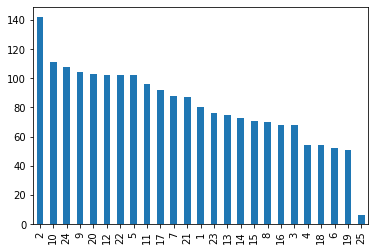

In [26]:
raw_df["Area"].value_counts().plot.bar()

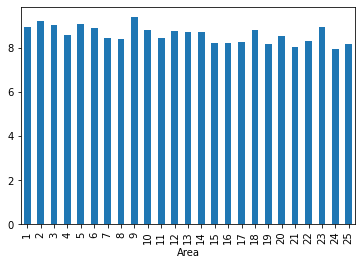

In [27]:
raw_df.groupby("Area")["NPS"].mean().plot.bar()

## 2. NPS

- What is the distribution of NPS?
- What's the most typical score?

In [28]:
raw_df["NPS"].describe()

count    2035.000000
mean        8.622113
std         2.374314
min         0.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: NPS, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


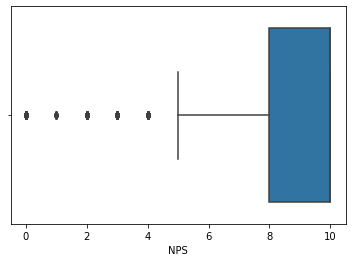

In [29]:
sns.boxplot(raw_df["NPS"])
plt.show()

The data is heavily skewed to the left. ~75 percent of the response have NPS >= 8 (Promoter, 8 Neutral). ALmost 100% percent of the data have value from 5 upwards, meaning NPS score < 5 can be classify as abnormal (outlier).

In [30]:
raw_df["NPS"].isnull().sum()

0

There's no missing NPS data

No missing value regarding NPS score

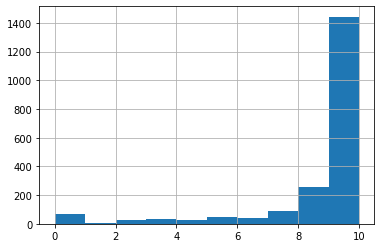

In [31]:
raw_df["NPS"].hist()

NPS data is highly skewed. More specifically, left-skewed, which indicates overwhelmingly survey response saying they are satisfying with Blue Mountain childcare. 75% percent of the customer having NPS >= 8.

NPS is at the center of our analysis. One of the most important stats that business use to understand and make decision upon customer satisfaction and loyalty using the products/service

We have another data that can help us label and have more meaningful understanding about this precious metrics: NPS Label

### NPS Label

What is the distribution of NPS Label?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


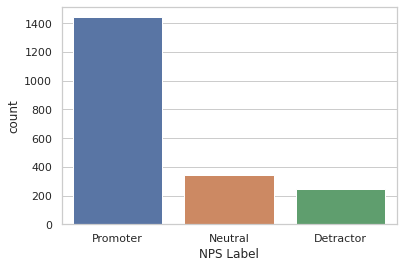

Total of response 2035


In [32]:
sns.set_theme(style="whitegrid")
sns.countplot(raw_df["NPS Label"])

plt.show()
print("Total of response", raw_df.shape[0])

~70% the response indicate they are promoters to the healthcare. We have ~18% the response saying they are Neutral Customer -> ~12% are Detractor.  


How many customer are extreme Detractor? (From the above analysis it's reasonable to assume that those who have score <= 4 are the extreme Detractor)

In [33]:
raw_df[raw_df["NPS"] <= 4].shape[0] / raw_df.shape[0]

0.07665847665847667

The result show that ~7.5% of customer can be deemed as "extreme" Detractor. 4.5% of customer will be deemed as "light" Detractor.

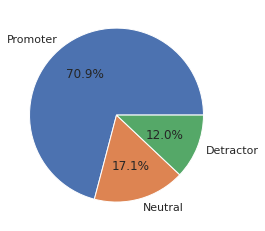

In [34]:
plt.pie(raw_df["NPS Label"].value_counts(), labels = raw_df["NPS Label"].value_counts().index, autopct='%1.1f%%')
plt.show()

Just as the previous analysis suggest, but more obvious through bar chart visualisation. Most of the response suggest they are promoter (>1400 response), while. Detractor are the least popular NPS response (<300 response).

- What is the most popular score for each label?

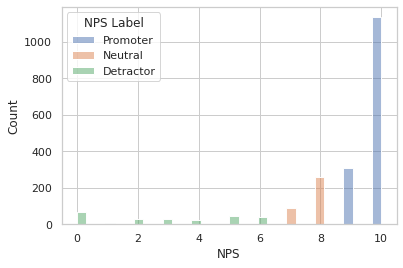

In [35]:
sns.histplot(data = raw_df, x = "NPS", hue = "NPS Label")
plt.show()

The most popular score is 10, least popular score is 1 (seems like 0 count). For neutral, the most popular socre is 8. For Detractor, the most popular score is 0, this trend and unpopular score 1 both seems to indicate the tendency to overexaggerate the good and bad experience from the customer. 

The one with perfect score seems to be pretty important to analyse and understand their experience. The one with "zero" score also seem to be very imporant to understand why they have such bad experience. Lastly, relative similar score but different in terms of NPS Label can be analysed and compared to see what it takes for the customer to move from one experience state to the other state

## Category rating

Next, we will analyse how customer rating for different service looks like?
- The staff we met were friendly and the ambience and atmosphere was positive, fun, and engaging.
- The curriculum, programs, and activities seem exciting and engaging for my child/children.
- The Visit booking process was smooth and hassle free.
- The environment and facilities were clean, safe, and beneficial for my child/children's development.
- The information and experience provided by the Visit guide was helpful and enjoyable.
- My questions were effectively answered by the Visit guide.
- The meals to be provided looked nutritious, fresh, and healthy.
- The price of Blue Mountain childcare matches my expectations.

In [36]:
category_list = ['Ambience And Atmosphere', 'Curriculum and Activities', 'Visit Booking Process', 'Environment And Facilities', 'Information and Experience', 'Questions','Nutritious Meals', 'Value For Money']

In [37]:
raw_df[category_list].describe()

,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,Nutritious Meals,Value For Money
count,1953,1969,1979,1957,1972,1952,1958,1951
unique,5,5,5,5,5,5,5,5
top,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree
freq,1518,1259,1576,1332,1507,1557,1066,826


For all of the category, "Question", "Information & Experience", "Ambience & Atmostphere" and "Visiting Booking Process" seems to have the highest rating. Almost 3/4 responders gave highest rating (Strongly Agree) for these category.

Value for Money, Nutritious Meal have lowest rating, which indicate meal and price didn't perfectly match customer expectation.

Let's see the overall distribution for more informative insight.

Each category has 5 types of response, from Strong Agree(5) to Strongly Disagree(1). Let's plot the distribution of the Rating for every category. We want to see if there's any category stood out as best/worst in customer mind

In [38]:
#Create new dataframe regarding distribution of answer from each category
def create_rating_df(raw_df):
  category_dict_list = []
  for category in category_list:
    category_dict = {}
    category_dict["Category"] = category
    rating_dist = raw_df[category].value_counts()
    for index, value in rating_dist.iteritems():
      category_dict[index] = value
    category_dict_list.append(category_dict)

  category_dict_list
  category_df = pd.DataFrame(category_dict_list)
  return category_df

In [39]:
#Plot stacked bar chart for each category to see response distribution
def plot_rating_distribution(category_df):
  ax = category_df.plot.bar(stacked = True, x = "Category", figsize = (10, 5))
  ax.set_title('The Rating distribution per category', fontsize=20)
  ax.set_xticklabels(['Ambience & Atmosph','Curriculumn','Visit Booking', "Env & Faci", "Info & exp", "Question", "Meal", "Fee"], rotation = 45)
  plt.show()


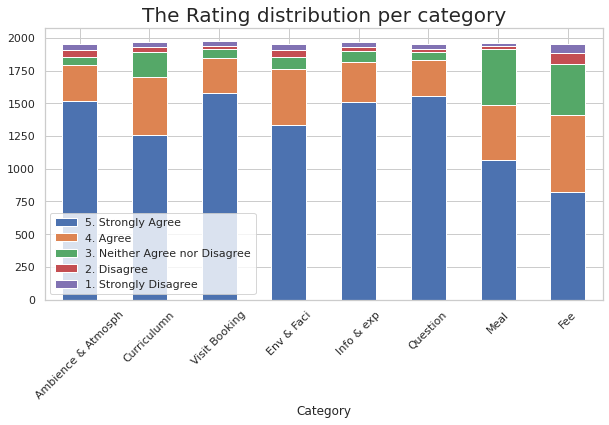

In [40]:
category_df = create_rating_df(raw_df)
plot_rating_distribution(category_df)

The highest rating:
1. Visit Booking Process 
2. Question
3. Info & Exp
4. Ambience & Atmosphere

**Takeaway: Bluemountain nailed it when it comes to customer first impression. The experience that the childcare offer when parents come to visit (booking process, questions addressed by the staffs) the Childcare are mostly positive**

The lowest rating:
1. Fee
2. Meal
3. Environment & facilities
4. Curriculum

**Fee and meal show the lowest rating, especially when it comes to fee, about 70-75% of customer agree or strongly agree that the price of childcare service match their expectation.** This number is different when it comes to other category (88% agree or strongly agree when it comes to other category)

Curriculumn and Environtment & Facilities are two category that saw a jump in the number of customer who agree instead of strongly agree. **It means that the quality of these category has somewhat matched customer expectation, but not exceed and excites them as much as other category. There's definitely room for improvement coming forward to the future.**

Interesting trend:

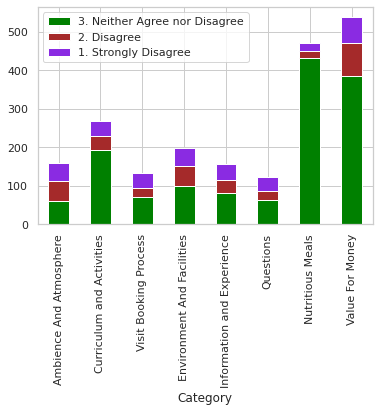

In [41]:
category_df[["Category", "3. Neither Agree nor Disagree", "2. Disagree", "1. Strongly Disagree"]].plot.bar(stacked = True, x = "Category", color = ["green", "brown", "blueviolet"])
plt.show()

The visual shows how many customer have neutral or negative experience with each of the category. In general, the higher the bar the more neutral & negative sentiment toward a particular category.



*Visiting Experience*

From what we we saw in the previous graphs, it's not surprise to see the three categories related to visiting experience have very low rate of negative and neutral responses

*Curriculumn and Activities vs Ambience and Atmostphere vs Environtment and Facilitites and Nutritious Meals*

Those are the categories which also have relatively low rate of neutral + negative rating as well. Curriculumn and Activities have higher neutral response rate, but lower negative response, while Environment and Ambience and Atmostphere have lower neutral response rate, but more negative response rate. 

The second highest in terms of Neg + Neutral rating comes to Meal Nutrition. It comprise of large proportion of neutral rating and very small proportion of negative rating. Infact, it has the lowest number of negative rating. The quite similar trends goes to Curriculum & Activities Rating.

Contrastly, for Ambience&Atmostphere and Environtment&Facilities, the number of of negative response are relatively more dominant than neutral response. It either the customer (parents/students) like it or don't like it. 


####We also have response that have some missing rating data (for some categories). Are they systemally missing or randomly. Let's see

In [42]:
category_df = raw_df[category_list]
missing_category_df = raw_df[category_df.notnull().all(axis=1) == False]
print(missing_category_df.shape)
missing_category_df.head()

(86, 24)


,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
23,15,Corinda,8,Neutral,4. Agree,4. Agree,4. Agree,4. Agree,4. Agree,4. Agree,...,2022-05-18,2022-05-13,"""Campus Directors & Educators""",NaN,2022-05,2022,2022-Q2,Closed,2022-05-26 07:36:05.308,Green
77,10,Nerang,8,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-05-13,2022-05-09,"""App & Child Updates"",""Communication"",""Curricu...",NaN,2022-05,2022,2022-Q2,None,NaT,Blue
140,2,Mount Evelyn,6,Detractor,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-05-04,2022-04-28,"""Curriculum & Programs""",NaN,2022-05,2022,2022-Q2,Closed,2022-05-09 11:47:49.664,Red
239,4,Sanctuary Point,9,Promoter,NaN,5. Strongly Agree,5. Strongly Agree,NaN,5. Strongly Agree,NaN,...,2022-04-22,2022-04-19,"""Campus Directors & Educators"",""Environment & ...",NaN,2022-04,2022,2022-Q2,Closed,2022-04-26 12:52:38.746,Red
260,23,Kyneton,10,Promoter,NaN,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,NaN,...,2022-04-22,2022-04-19,"""Campus Directors & Educators"",""Curriculum & P...",NaN,2022-04,2022,2022-Q2,Pending,2022-04-22 20:48:14.540,Green


In [43]:
raw_df.shape

(2035, 24)

In total, we have 86 missing data, about 4% of total number of response. The low number seems to indicate a quite random missing trend, however, it's still worthwhile to investigate on the matter whether it's systematically missing. If it's random, we can exclude them and still have a quite representative insight from the remaining response data.

As there are many data dimension, we will focus on some important dimensions only (NPS, category rating)

In [44]:
#NPS Label distribution of missing data
df = missing_category_df.copy()
df["NPS Label"].value_counts()/df["NPS Label"].shape[0]

Promoter     0.604651
Detractor    0.232558
Neutral      0.162791
Name: NPS Label, dtype: float64

In [45]:
#NPS Label distribution of whole dataset
raw_df["NPS Label"].value_counts()/raw_df["NPS Label"].shape[0]

Promoter     0.709091
Neutral      0.170516
Detractor    0.120393
Name: NPS Label, dtype: float64

The total number of promter are 60%, detractor are 23%. This is quite staggering differences from the distribution of the whole data. My hypothesis is that bad experience had led to low responses/engagement. Let's see the distribution of the actual NPS score if it support my hypothesis: 

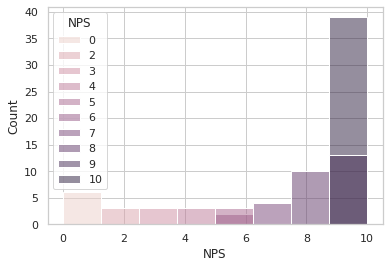

In [46]:
sns.histplot(data = df, x = "NPS", hue = "NPS")
plt.show()

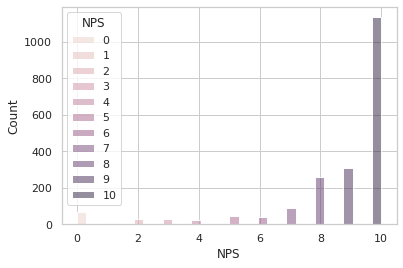

In [47]:
sns.histplot(data = raw_df, x = "NPS", hue = "NPS")
plt.show()

The distribution is quite identical, except that the proportion of customer giving rating (2-6) is higher than the whole dataset distribution

In [48]:
print("Avg NPS for missing data:", round(df["NPS"].mean(), 2))
print("Avg NPS for complete dataset:", round(raw_df["NPS"].mean(), 2))

Avg NPS for missing data: 7.78
Avg NPS for complete dataset: 8.62


And this lead to a lower overall NPS score

The proportion of Detractor is interestingly higher than usual.

We also want to see how these customer fill out the category rating data. I've noticed there are rows with completely missing rating data while some rows have only few value missing. Let's see

In [49]:
#Extract how many rows have completely missing category missing value
raw_df[category_df.isnull().all(axis=1)].shape

(55, 24)

55/84 rows have completely missing rating data. If my hypothesis is right, they have to be customer with extreme rating.

In [50]:
#save in a new df called missing_all_rating
missing_all_rating = raw_df[category_df.isnull().all(axis=1)]
missing_all_rating["NPS Label"].value_counts()/missing_all_rating.shape[0]

Promoter     0.636364
Detractor    0.236364
Neutral      0.127273
Name: NPS Label, dtype: float64

It does show some trend, but the actual increasement came from number of Promoter.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


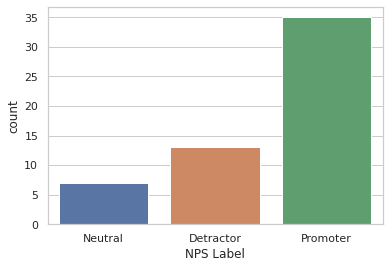

In [51]:
sns.countplot(missing_all_rating["NPS Label"])
plt.show()

Some category have more missing value than others:

1.   Ambience And Atmosphere
2.   Questions
3.   Value For Money

While some category have more available value than others:

1.   Visit Booking Process
2.   Information and Experience
3.   Curriculum and Activities

This might be of the fact that there's not enough information for them to give their rating by the time the survey was released yet.

Anyway, we will leave this here for now and start doing other analysis

## Regression Analysis:

Now, to see relationship between these rating to NPS score, let's create a correlation table and also regression analysis

In [52]:
#Firstly, we need to transform data from text to numerical type
df = raw_df.copy()
non_missing_df = df[df[["NPS"] + category_list].notnull().all(axis=1)]
for category in category_list:
  non_missing_df[category] = non_missing_df[category].apply(lambda x: int(x[0]))

non_missing_df[category_list + ["NPS"]].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,Nutritious Meals,Value For Money,NPS
Ambience And Atmosphere,1.000000,0.716465,0.461045,0.723580,0.779540,0.742730,0.523739,0.501275,0.741197
Curriculum and Activities,0.716465,1.000000,0.418700,0.739725,0.690045,0.643565,0.620347,0.529060,0.707536
Visit Booking Process,0.461045,0.418700,1.000000,0.421323,0.492315,0.497236,0.353208,0.335793,0.348128
Environment And Facilities,0.723580,0.739725,0.421323,1.000000,0.644892,0.593993,0.545168,0.526753,0.742591
Information and Experience,0.779540,0.690045,0.492315,0.644892,1.000000,0.809334,0.516270,0.487351,0.675787
Questions,0.742730,0.643565,0.497236,0.593993,0.809334,1.000000,0.492762,0.482006,0.629045
Nutritious Meals,0.523739,0.620347,0.353208,0.545168,0.516270,0.492762,1.000000,0.447081,0.496750
Value For Money,0.501275,0.529060,0.335793,0.526753,0.487351,0.482006,0.447081,1.000000,0.554838
NPS,0.741197,0.707536,0.348128,0.742591,0.675787,0.629045,0.496750,0.554838,1.000000


Ambience & Atmostphere, Curriculum & Activities as well as Environment & Facilities are highly correlated with NPS score.

Conversely, Nutrious Meals and Value for Money and especially Visit booking process are much less correlated with NPS score 

In [53]:
df = non_missing_df.copy()
import statsmodels.api as sm

y = df["NPS"]
X = df[category_list].astype(float)
X=sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NPS   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     510.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:23:28   Log-Likelihood:                -3309.8
No. Observations:                1949   AIC:                             6638.
Df Residuals:                    1940   BIC:                             6688.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

**Low VIF score for all IV indicates there's no evidence of multicolinearity issues**

Nutritious Meals are found have no linear relationship with NPS Score, which is suprising. I personally think that there should be relationship between this rating and NPS. So the next possible question is:
Is there any non-linear relationship between Nutirous Meals rating and NPS Score?

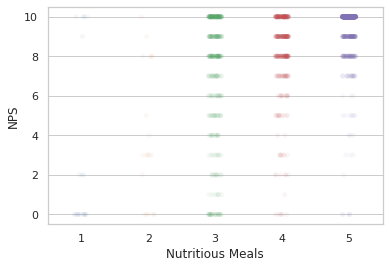

In [55]:
sns.stripplot(y="NPS", x="Nutritious Meals", data = df, alpha = 0.05)

Most of the customer who gave negative rating for Nutritious Meals are Detractors (0 - 4) are most frequent score: 

- Customer who neither disagree and agree are really varied in their NPS status. Most of them are Promoter but quite often they are Neutral or Detractor.
- Customer who agree have pretty high rating end up being Promoter.

Also, remember that Nutrious meals have the most customer giving Neutral Rating (> 400 responses), this can potentially cause noise and overshadow the significance level/impact that Nutrious meals rating having on NPS.

**I argue that Nutrious meal while being viewed as one of the worst category, it does not have as strong impact on NPS  as other category.**



One other variable also receive "not-so-good" rating is "Value for Money a.k.a Fee". They have positive and statistically relationship with NPS. Let's plot them out to validate our understanding

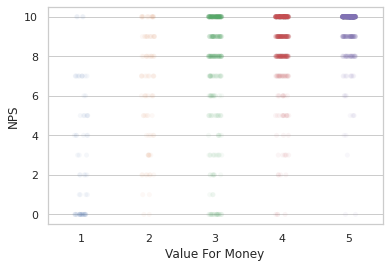

In [56]:
sns.stripplot(y="NPS", x="Value For Money", data = df, alpha = 0.05)

The trend is both clearer and less clearer in someway, if compare with Nutritious Meal
- Customer who have neutral and positive rating, usually end up being promoter (the trend is stronger than Nutritious in this sense)
- However, customer who have negative rating (1, 2) can aslo end up being a promoter and neutral. 

**Price is important factor for customer NPS, but definitely not the single important single factor.**

**Even if customer felt that the price is unreasonably high, there's chance that they are still satisfy with the childcare as long as other service are good/exceed their expectation**

Next, we want to see why Visit Booking Process rating actually have negative impact on NPS (Which literally mean the more customer satisfy with the VIsiting Booking Process, the less they satisfy with the whole healthcare service)

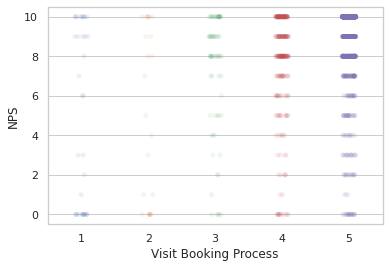

In [57]:
sns.stripplot(y="NPS", x="Visit Booking Process", data = df, alpha = 0.1)
plt.show()

It's interesting, customer can still end up a detractor if they satisfy with Visitng Booking Process (VBP). Let's dig deeper a little more by selecting the one who satisfy with VBP but are Detractor

In [58]:
categories= ['Ambience And Atmosphere', 'Curriculum and Activities', 'Environment And Facilities', 'Information and Experience', 'Questions','Nutritious Meals', 'Value For Money']

In [59]:
VBP_detractor = df[(df["Visit Booking Process"] > 3) & (df["NPS"] < 7)]
VBP_detractor[["NPS"] + categories].head()

,NPS,Ambience And Atmosphere,Curriculum and Activities,Environment And Facilities,Information and Experience,Questions,Nutritious Meals,Value For Money
6,4,5,5,5,5,5,5,1
29,0,5,5,4,5,5,4,4
39,5,4,4,4,3,3,4,3
50,4,2,3,4,4,4,3,4
60,3,4,2,4,4,5,4,4


There seems to be a trend that customer give positive rating for VPB but give negative rating for at least one of those in other category. TO validate this, we answer a question:

- for each customer, whether there's any category that have negative rating?
- Which one? and How many?

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


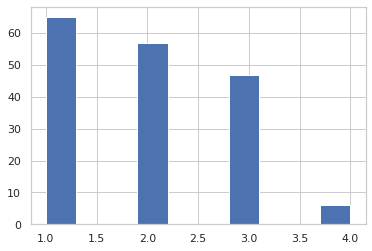

In [60]:
VBP_detractor.loc[:, "lowest_rating"] = VBP_detractor[categories].min(axis = 1)
VBP_detractor["lowest_rating"].hist()
plt.show()

About 5 customer are Detractor eventhough they satisfy with all categories.
The rest have at least one category that they at most have neutral rating.

This imply a potential issue here:
1. *Visit Booking Process is one of the first interaction with customer -> It's neccessary to give them a smooth and good impression*
2. *However, this won't guarantee customer satisfaction, but a good impression would rather set a high bar for subsequent interaction/services provided by the childcare.*
3. *It's important to maintain a high level of satisfaction of other service in order to ensure customer high NPS and satisfaction.*
4. *Managing customer expectation so that information that they receive from the Visit Booking Process is accurate to what they actually see/experience in the real Visit.*

Lastly, let's check the look of top 3 important feature
1. Ambience And Atmosphere       
2. Curriculum and Activities   
3. Environment And Facilities 

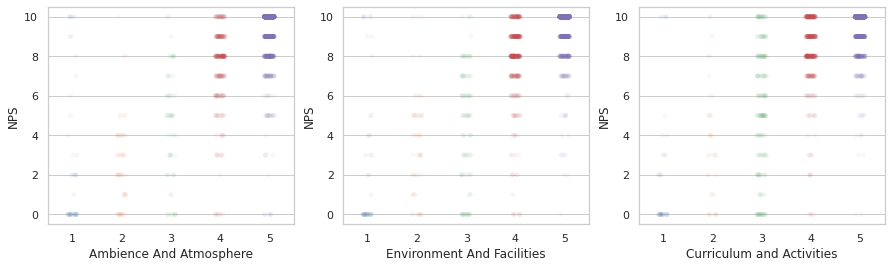

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figwidth(15)
sns.stripplot(y="NPS", x="Ambience And Atmosphere", data = df, alpha = 0.05, ax = ax1)
sns.stripplot(y="NPS", x="Environment And Facilities", data = df, alpha = 0.05, ax = ax2)
sns.stripplot(y="NPS", x="Curriculum and Activities", data = df, alpha = 0.05, ax = ax3)

THe trend and positive relationship of these three category rating are the most evidence: linear and uptrend. We can see that customer have bad rating for each of these, almost always end up giving a low NPS, and customer have good rating for each of these, almost always end up givng a high NPS. Except for curriculum and activities, if customer don't give a high rating for these category (either bad or neutral), it's almost impossible to see them end up being a Promoter.

This is a strong evidence showing us how important these category of experience are to shape customer overall experience to the childcare. 

# NPS Answer Category vs Improvement Category

Now, let's move on to one of the most interesting data items that I've noticed first time engage with the dataset. A qualitative data items which shows why customers gave such NPS score to the survey (either good or bad) in written format. I assume that due to the nature of survey (quite time-consuming), the answer provided by customers will be very directly and mention only the most important aspects. 

We have two different columns regarding these information. 
NPS Feedback Categories and Improvement Feedback Categories

In [63]:
focus_columns = ['NPS Feedback Categories', 'Improvement Feedback Categories']

In [64]:
df = raw_df.copy()

In [65]:
df[focus_columns].head()

,NPS Feedback Categories,Improvement Feedback Categories
0,"""Campus Directors & Educators"",""Curriculum & P...",NaN
1,"""Communication""",NaN
2,"""Campus Directors & Educators"",""Cleanliness & ...",NaN
3,"""App & Child Updates"",""Campus Directors & Educ...",NaN
4,"""Campus Directors & Educators"",""Communication""",NaN


The data, I believe, has been cleaned and pre-processed so that the actual responses now turned into a list of different topics/categories (As we can see above). Also Improvement Feedback Categories columns seems to have quite many missing data. This seems natural because of the type of information and also because both columns have certain degree of similarities. If a customer are happy customer, they probably don't have anything to complain/want to improve. However, if customer are neutral/detractor, they can mention through the Improvement feedback question, but they can also mention it in NPS Feedback Categories, both good things and bad things. 

Alright, without further discussion, let's see the data!!

In [66]:
#Create a function which help me to process the text data, seperate the categories and count how many time each categories were mention. 
#Then we can see a clear picture of what are some most common categories/topics mentioned
def transform_feedback_data(data, column = "NPS Feedback Categories"):
  category_dict = {}
  for index, row in data.iterrows():
    if pd.isnull(row[column]): 
      continue
    categories = row[column].replace('"','').split(',')
    for category in categories:
      if category in category_dict:
        category_dict[category] += 1
      else:
        category_dict[category] = 1
  return category_dict

Total of Feedback: 2035


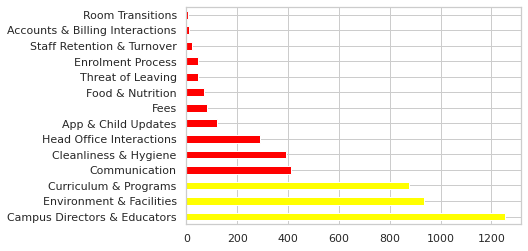

In [83]:
print("Total of Feedback:", df["NPS Feedback Categories"].notnull().sum())
pd.Series(transform_feedback_data(df)).sort_values(ascending=False).plot.barh(color = ["yellow","yellow", "yellow", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red" ] )

The responses have been normalised into 14 topics (as see from above). There are topics which was mentioned more often than other, in fact, quite significant. We can clearly see the top 3 and top 6 from the visualisation.

The top 3 are:
1. Campus Directors & Educators
2. Environment & Facilities
3. Curriculumn & Program

This insight is very consistent with our finding from regression analysis

Campus Directors and Educators are actually very similar to Ambience and Atmosphere. To clarify, for that category, the survey actually ask rating whether: 
*   *The staff we met were friendly and the ambience and atmosphere was positive, fun, and engaging.*

We can now have a pretty strong evidence that these are three most important factors that determine a chilcare customer satisfaction level.

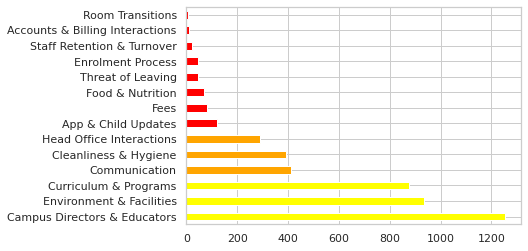

In [85]:
pd.Series(transform_feedback_data(df)).sort_values(ascending=False).plot.barh(color = ["yellow","yellow", "yellow", "orange", "orange", "orange", "red", "red", "red", "red", "red", "red",  "red",  "red"] )

The top 6 (3 more categories besides the top 3) are:
4. Communication
5. Cleaniness & Hygiene
6. Head Office Interactions

These are topics which aren't mentioned in the rating categories, but as my understanding, it does cross at certain regards:
- Communication and Head Office Interactions can definitely related to the Information and Experience category.
- While Cleanliness & Hygiene is a frequent topic brought up more often due to Covid, but it nevertheless one aspect of Environment & Facilities.   

Less frequent mentioned topics:
- App & Childs Update (sounds like an aspect of Communication & Head Office interactions in some regards)
- Fees (Value For Money)
- Food & Nutrition
- Threat of leaving (Probably a mistypo: living - leaving)
- Enrolment Process (Admin work)
- Staff Retention & Turnover
- Accounts and Billing Interactions
- Room Transitions

These are much less brought up topics, meaning they play much less important role to define the customer satisfaction. Perhaps the most unexpected results that surfaced here is that Fees and Food aspects, some takeaway from this:
- Customers did not prioritize Value for Money when it comes to childcare service
- Food and Nutrition is not so much important to define customer satisfaction.

I still hold quite strong belief that these two are the baseline for customer satisfaction (especially Food and Nutrition), and as long as the quality of the Food and Nutrion meet customer expectation, it will be good enough (we do have a quite strong evidence base on the scatterplot discuss above in the previous category rating section) 



We actually can do a lot of analysis with the Feedback categories if combining with other dimensions (NPS/Area/City), but let's skip it as off now and move to another qualitative dimension, **improvement feedback category**

This data dimension can potentially show us what's the most important aspects that Blue Moutain should focus on to further improve customer satisfaction.

Total of Feedback: 385


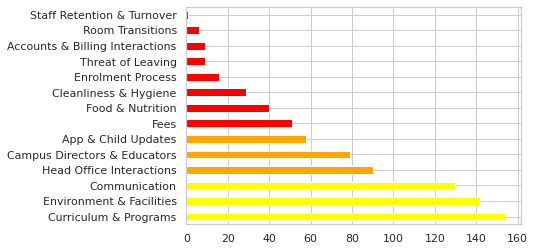

In [86]:
#Using the transform_feedback_data function again to breakdown improvement feedback categories data and plot them using barplot horizontal.
print("Total of Feedback:", df["Improvement Feedback Categories"].notnull().sum())
pd.Series(transform_feedback_data(df, column = 'Improvement Feedback Categories')).sort_values(ascending=False).plot.barh(color = ["yellow","yellow", "yellow", "orange", "orange", "orange", "red", "red", "red", "red", "red", "red",  "red",  "red"])

WE can see that the pattern is not as clear as the previous analysis.
We have a quite stand-out top 3 (but not as significant as the previous data):
- *Curriculum & Programs*
- *Environment & Facilities*
- *Communication*

and the top 6 (not as strong as the previous charts):
- *Head Office Interactions*
- *Campus Directors & Educators*
- *App & Child Updates*

Each of them account for about 35-40% of the total non-missing response.

They are also the aspects in top 6 of most important childcare features to determine customer satisfaction and NPS. However, Campus Directors & Educators drop out of top 3, while Communication join from top 4 to top 3.

There are definitely room for grow for these top 3 aspects. **Communication saw the most increase in terms of mentioned volumes. This's potentially the most urgent aspect to improve, following by Curriculumn and Environment Aspect**.

**The only one aspect drop out of the top 6 is Cleaniness and Hygiene. The drop of mentioned volumn of Campus Directors and Educators also means they're less urgent**, although they're still very important. The human team of Blue Mountain's showing strong evidence of doing a good job. My recommendation is to management is to try our best to keep these people, because they're vital to the success/satisfaction of our students/parents.

# Exploratory Data Analysis ends here!!

The next part is dedicated for further indept analysis, and still on-going project. Please skip if you're not interested in :)

# Additional Analysis

Total of Feedback: 1443


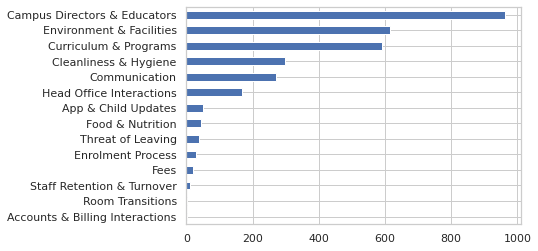

In [69]:
#Feedback analysis of active promoter
print("Total of Feedback:", df[df['NPS Label'] == 'Promoter'].shape[0])
pd.Series(transform_feedback_data(df[df['NPS Label'] == "Promoter"], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

Feedback analysis result on customers who are reported to be promoter remained consistent with the overall finding. ~70% customer praise the quality of "Campus Directors & Educators". "Environment" and "Curriculumn" comes 2nd and 3rd, indicate such strong quality on these matters. 

Looking at Passiver can partially help us to understand what we to improve to make Passiver become Promoter

Total of Feedback: 347


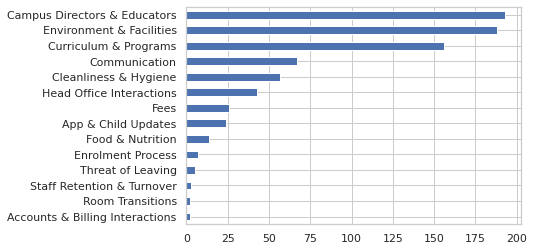

In [70]:
#Feedback analysis of active promoter
print("Total of Feedback:", df[df['NPS Label'] == 'Neutral'].shape[0])
pd.Series(transform_feedback_data(df[df['NPS Label'] == "Neutral"], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

Total of Feedback: 347


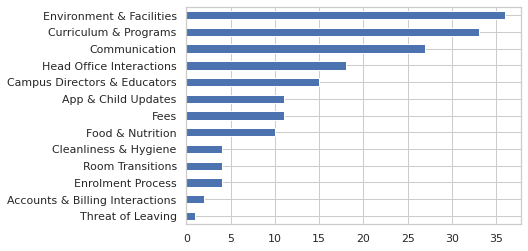

In [71]:
#Feedback analysis of active promoter
print("Total of Feedback:", df[df['NPS Label'] == 'Neutral'].shape[0])
pd.Series(transform_feedback_data(df[df['NPS Label'] == "Neutral"], column = 'Improvement Feedback Categories')).sort_values(ascending=True).plot.barh()

In [72]:
def handle_rating(rating):
  if pd.isnull(rating):
    return None
  number_rating = int(rating.split(".")[0])
  return number_rating

In [73]:
category_list = ['Ambience And Atmosphere', 'Curriculum and Activities', 'Visit Booking Process', 'Environment And Facilities', 'Information and Experience', 'Questions','Nutritious Meals', 'Value For Money']

neutral_df = df[df['NPS Label'] == "Neutral"]

for category in category_list:
  neutral_df[category] = neutral_df[category].apply(lambda x:handle_rating(x))

for category in category_list:
  print("Rating for",category)
  print(neutral_df[category].mean())

Rating for Ambience And Atmosphere
4.508982035928144
Rating for Curriculum and Activities
4.205970149253731
Rating for Visit Booking Process
4.591176470588235
Rating for Environment And Facilities
4.253731343283582
Rating for Information and Experience
4.520833333333333
Rating for Questions
4.577844311377246
Rating for Nutritious Meals
3.976119402985075
Rating for Value For Money
3.6786786786786787


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Nutritious Meals: 2nd Lowest

Value For Money: Lowest

Curriculum and Activities: 4.2

Environment And Facilities: 4.25




In [74]:
category_list = ['Ambience And Atmosphere', 'Curriculum and Activities', 'Visit Booking Process', 'Environment And Facilities', 'Information and Experience', 'Questions','Nutritious Meals', 'Value For Money']

promoter_df = df[df['NPS Label'] == "Promoter"]

for category in category_list:
  promoter_df[category] = promoter_df[category].apply(lambda x:handle_rating(x))

for category in category_list:
  print("Rating for",category)
  print(promoter_df[category].mean())

Rating for Ambience And Atmosphere
4.907460545193687
Rating for Curriculum and Activities
4.754448398576512
Rating for Visit Booking Process
4.803127221037669
Rating for Environment And Facilities
4.832498210450966
Rating for Information and Experience
4.8775800711743775
Rating for Questions
4.900215362526921
Rating for Nutritious Meals
4.51432664756447
Rating for Value For Money
4.342426417803302


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Rating for Curriculum and Activities: 4.75
Rating for Environment And Facilities: 4.83

Total of Feedback: 245


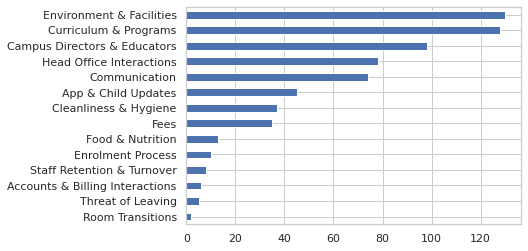

In [75]:
#Feedback analysis of active promoter
print("Total of Feedback:", df[df['NPS Label'] == 'Detractor'].shape[0])
pd.Series(transform_feedback_data(df[df['NPS Label'] == "Detractor"], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

Total of Feedback: 245


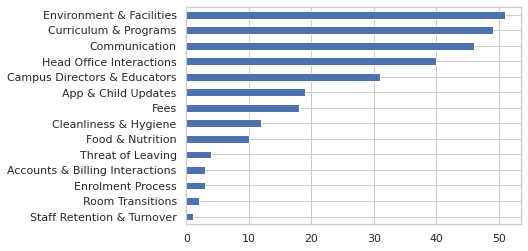

In [76]:
#Feedback analysis of active promoter
print("Total of Feedback:", df[df['NPS Label'] == 'Detractor'].shape[0])
pd.Series(transform_feedback_data(df[df['NPS Label'] == "Detractor"], column = 'Improvement Feedback Categories')).sort_values(ascending=True).plot.barh()

In [77]:
category_list = ['Ambience And Atmosphere', 'Curriculum and Activities', 'Visit Booking Process', 'Environment And Facilities', 'Information and Experience', 'Questions','Nutritious Meals', 'Value For Money']

detractor_df = df[df['NPS Label'] == "Detractor"]

for category in category_list:
  detractor_df[category] = detractor_df[category].apply(lambda x:handle_rating(x))

for category in category_list:
  print("Rating for",category)
  print(detractor_df[category].mean())

Rating for Ambience And Atmosphere
3.017777777777778
Rating for Curriculum and Activities
2.88646288209607
Rating for Visit Booking Process
4.047413793103448
Rating for Environment And Facilities
2.848888888888889
Rating for Information and Experience
3.242424242424242
Rating for Questions
3.528888888888889
Rating for Nutritious Meals
3.2202643171806167
Rating for Value For Money
2.6577777777777776


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Time Series Analysis

In [ ]:
#df = raw_df.copy().set_index('Survey Response Date [GMT]')
df = raw_df.copy()

In [ ]:
df.columns

Index(['Area', 'City', 'NPS', 'NPS Label', 'Ambience And Atmosphere',
       'Curriculum and Activities', 'Visit Booking Process',
       'Environment And Facilities', 'Information and Experience', 'Questions',
       'Nutritious Meals', 'Value For Money', 'Survey Response Date [GMT]',
       'Responded Week Starting on [GMT]', 'Survey Sent Date [GMT]',
       'Start Date', 'NPS Feedback Categories',
       'Improvement Feedback Categories', 'Response Month (YYYY-MM)',
       'Response Year (YYYY)', 'Response Quarter (YYYY-Q#)', 'Workflow Status',
       'Last Modified Date', 'Division'],
      dtype='object')

In [ ]:
sns.lineplot(data=df, x='month', y='NPS')
plt.show()

In [ ]:
df = raw_df.copy()
NPS_labels = ["Promoter", "Detractor", "Neutral"]
period_list = ["2021-Q4","2022-Q1","2022-Q2"]
for category in category_list:
  df[category] = df[category].apply(lambda x:handle_rating(x))
  
for period in period_list:
  print(period, ":",round(df_period["NPS"].mean(),2))
  df_period = df[df['Response Quarter (YYYY-Q#)'] == period]
  print(df_period.shape[0])
  for category in category_list:
    print("Rating for",category,"in period", period, ":", round(df_period[category].mean(),2))


pd.Series(transform_feedback_data(df[df['Response Quarter (YYYY-Q#)'] == "2021-Q4"], column ='Improvement Feedback Categories')).sort_values(ascending=True).plot.barh()

In [ ]:
print(df[(df['Response Quarter (YYYY-Q#)'] == "2021-Q4") & (df["NPS Label"] == "Detractor")].shape[0])
pd.Series(transform_feedback_data(df[(df['Response Quarter (YYYY-Q#)'] == "2021-Q4") & (df["NPS Label"] == "Detractor")], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

In [ ]:
print(df[(df['Response Quarter (YYYY-Q#)'] == "2022-Q1") & (df["NPS Label"] == "Detractor")].shape[0])
pd.Series(transform_feedback_data(df[(df['Response Quarter (YYYY-Q#)'] == "2022-Q1") & (df["NPS Label"] == "Detractor")], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

In [ ]:
print(df[(df['Response Quarter (YYYY-Q#)'] == "2022-Q2") & (df["NPS Label"] == "Detractor")].shape[0])
pd.Series(transform_feedback_data(df[(df['Response Quarter (YYYY-Q#)'] == "2022-Q2") & (df["NPS Label"] == "Detractor")], column = 'NPS Feedback Categories')).sort_values(ascending=True).plot.barh()

# Division Analysis

In [ ]:
raw_df["Division"].value_counts()

Green     665
Blue      576
Red       354
Purple    237
Orange     86
Yellow     68
Grey       48
Name: Division, dtype: int64

In [ ]:
raw_df.groupby("Division")["NPS"].agg(nps_mean = ("mean"))

,nps_mean
Division,
Blue,8.644097
Green,8.527820
Grey,8.145833
Orange,8.058140
Purple,8.476793
Red,8.966102
Yellow,9.132353


# Transform the Data for Tableau Viz

In [ ]:
#copy into a new data
df = raw_df.copy()

In [ ]:
df.head()

,Area,City,NPS,NPS Label,Ambience And Atmosphere,Curriculum and Activities,Visit Booking Process,Environment And Facilities,Information and Experience,Questions,...,Survey Sent Date [GMT],Start Date,NPS Feedback Categories,Improvement Feedback Categories,Response Month (YYYY-MM),Response Year (YYYY),Response Quarter (YYYY-Q#),Workflow Status,Last Modified Date,Division
0,7,Sydney,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Curriculum & P...",NaN,2022-05,2022,2022-Q2,Closed,2022-05-25 16:47:45.627,Blue
1,4,Melbourne,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-11,2022-05-06,"""Communication""",NaN,2022-05,2022,2022-Q2,Closed,2022-05-25 17:41:09.508,Red
2,13,Brisbane,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-04-29,2022-04-27,"""Campus Directors & Educators"",""Cleanliness & ...",NaN,2022-05,2022,2022-Q2,Closed,2022-05-24 10:40:36.112,Green
3,16,Perth,9,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-10,"""App & Child Updates"",""Campus Directors & Educ...",NaN,2022-05,2022,2022-Q2,In Progress,2022-05-24 13:04:49.949,Blue
4,20,Adelaide,10,Promoter,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,5. Strongly Agree,...,2022-05-13,2022-05-11,"""Campus Directors & Educators"",""Communication""",NaN,2022-05,2022,2022-Q2,Pending,2022-05-23 20:48:56.323,Purple


In [ ]:
#transform rating data
def transform_rating_data(rating_text):
  if pd.isnull(rating_text):
    return None
  rating_num = int(rating_text.replace('"',"").split(".")[0])
  return rating_num

rating_columns = ["Ambience And Atmosphere",	"Curriculum and Activities",	"Visit Booking Process",	"Environment And Facilities",	"Information and Experience",	"Questions",'Nutritious Meals', 'Value For Money']
rating_columns_num = []
for col in rating_columns:
  new_col = col + "_numerical"
  df[new_col] = df[col].apply(lambda x:transform_rating_data(x))
  rating_columns_num.append(new_col)

In [ ]:
df.columns

Index(['Area', 'City', 'NPS', 'NPS Label', 'Ambience And Atmosphere',
       'Curriculum and Activities', 'Visit Booking Process',
       'Environment And Facilities', 'Information and Experience', 'Questions',
       'Nutritious Meals', 'Value For Money', 'Survey Response Date [GMT]',
       'Responded Week Starting on [GMT]', 'Survey Sent Date [GMT]',
       'Start Date', 'NPS Feedback Categories',
       'Improvement Feedback Categories', 'Response Month (YYYY-MM)',
       'Response Year (YYYY)', 'Response Quarter (YYYY-Q#)', 'Workflow Status',
       'Last Modified Date', 'Division', 'Ambience And Atmosphere_numerical',
       'Curriculum and Activities_numerical',
       'Visit Booking Process_numerical',
       'Environment And Facilities_numerical',
       'Information and Experience_numerical', 'Questions_numerical',
       'Nutritious Meals_numerical', 'Value For Money_numerical'],
      dtype='object')

In [ ]:
#NPS feedback data transformation

def get_feedback_categories(feedback):
  if pd.isnull(feedback):
    return None
  return feedback.replace('"',"").split(",")


In [ ]:
#Create dummies variables for 
def get_feedback_categories_list(col):
  category_list = []
  for index, row in df.iterrows():
    if pd.isnull(row[col]):
      continue
    row_categories = get_feedback_categories(row[col])
    for categories in row_categories:
      if categories in category_list: continue
      category_list.append(categories)   

  return category_list

def add_prefix(list_, prefix):
  return [prefix + element for element in list_]

def get_dummies(list_, col, prefix):
  df[list_] = 0
  for index, row in df.iterrows():
    if pd.notnull(row[col]):
      categories_list = get_feedback_categories(row[col])
      df.at[index, add_prefix(categories_list, prefix)] = 1

def process_categories_data(col, prefix):
  list_ = get_feedback_categories_list(col)
  list_ = add_prefix(list_, prefix)
  get_dummies(list_, col, prefix)

process_categories_data('NPS Feedback Categories', "NPS_")
process_categories_data('Improvement Feedback Categories', "Improve_")

In [ ]:
NPS_columns = ['NPS_Campus Directors & Educators', 'NPS_Curriculum & Programs',
       'NPS_Environment & Facilities', 'NPS_Communication',
       'NPS_Cleanliness & Hygiene', 'NPS_App & Child Updates',
       'NPS_Staff Retention & Turnover', 'NPS_Threat of Leaving', 'NPS_Fees',
       'NPS_Head Office Interactions', 'NPS_Food & Nutrition',
       'NPS_Enrolment Process', 'NPS_Room Transitions',
       'NPS_Accounts & Billing Interactions']

In [ ]:
df[NPS_columns]

,NPS_Campus Directors & Educators,NPS_Curriculum & Programs,NPS_Environment & Facilities,NPS_Communication,NPS_Cleanliness & Hygiene,NPS_App & Child Updates,NPS_Staff Retention & Turnover,NPS_Threat of Leaving,NPS_Fees,NPS_Head Office Interactions,NPS_Food & Nutrition,NPS_Enrolment Process,NPS_Room Transitions,NPS_Accounts & Billing Interactions
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,1,1,1,1,0,1,0,0,0,0,0,0,0,0
2031,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2032,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2033,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.to_csv("blue_mountain.csv")